# Library

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

# Undefitting and Overfitting : KNN

> ## Table Of Contents

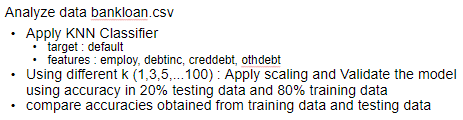

> ## Dataset : Bankloan Dataset

In [2]:
bankloan = pd.read_csv('bankloan.csv')

In [3]:
fitur = ['employ', 'debtinc', 'creddebt', 'othdebt']
target = ['default']

In [4]:
X = bankloan[fitur]
y = bankloan[target]

In [5]:
X

,employ,debtinc,creddebt,othdebt
0,17,9.3,11.359392,5.008608
1,10,17.3,1.362202,4.000798
2,15,5.5,0.856075,2.168925
3,15,2.9,2.658720,0.821280
4,2,17.3,1.787436,3.056564
...,...,...,...,...
695,6,4.6,0.262062,0.979938
696,6,11.5,0.369495,2.045505
697,15,7.6,0.491264,1.940736
698,19,8.4,2.302608,4.165392


In [6]:
y

,default
0,1
1,0
2,0
3,0
4,1
...,...
695,1
696,0
697,0
698,0


> ## Data Splitting

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify = y, # stratified random sampling
    test_size = 0.2, 
    random_state = 2020) # make the result consistent

> ## Standardization Process

In [8]:
X

,employ,debtinc,creddebt,othdebt
0,17,9.3,11.359392,5.008608
1,10,17.3,1.362202,4.000798
2,15,5.5,0.856075,2.168925
3,15,2.9,2.658720,0.821280
4,2,17.3,1.787436,3.056564
...,...,...,...,...
695,6,4.6,0.262062,0.979938
696,6,11.5,0.369495,2.045505
697,15,7.6,0.491264,1.940736
698,19,8.4,2.302608,4.165392


In [9]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
X_train_scaled

array([[0.06451613, 0.38141809, 0.19426856, 0.12266837],
       [0.58064516, 0.31784841, 0.21946884, 0.19818871],
       [0.22580645, 0.14669927, 0.0301265 , 0.02710951],
       ...,
       [0.61290323, 0.10513447, 0.01876867, 0.13858118],
       [0.58064516, 0.24694377, 0.04032285, 0.17337699],
       [0.        , 0.80684597, 0.13576391, 0.11726775]])

> ## Selection process of Factor k

In [11]:
k = range(1,100,2)
testing_accuracies = []
training_accuracies = []
score = 0

for i in k:
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train_scaled,y_train)

  y_predict_train = knn.predict(X_train_scaled)
  training_accuracies.append(accuracy_score(y_train,y_predict_train))

  y_predict_test = knn.predict(X_test_scaled)
  acc_score = accuracy_score(y_test,y_predict_test)
  testing_accuracies.append(acc_score)

  if score < acc_score:
    score = acc_score
    best_k = i

In [13]:
k

range(1, 100, 2)

Text(0, 0.5, 'accuracy')

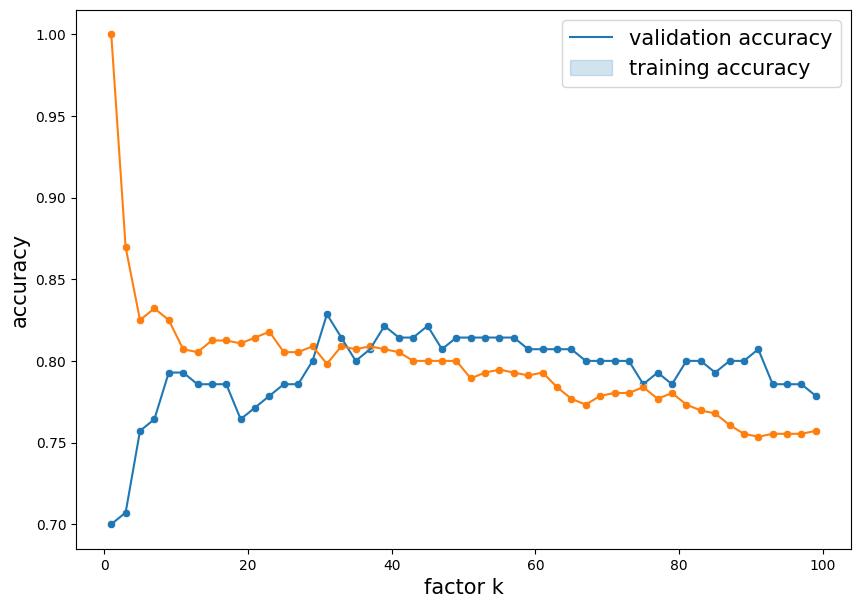

In [16]:
plt.figure(figsize = (10,7))
sns.lineplot(x = k,y = testing_accuracies)
sns.scatterplot(x = k, y = testing_accuracies)
sns.lineplot(x = k,y = training_accuracies)
sns.scatterplot(x = k,y = training_accuracies)
plt.legend(['validation accuracy','training accuracy'], fontsize = 15)
plt.xlabel('factor k', fontsize = 15)
plt.ylabel('accuracy', fontsize = 15)
# plt.xticks(list(k))

In [17]:
print('best k:', best_k)
print('accuracy:', score)

best k: 31
accuracy: 0.8285714285714286


1. The best factor k for this case is 31 with 82.86 % accuracy
1. For k = 1, the KNN method achieve 100 accuracy in training set but very bad accuracy in validation set
1. For k below 31, the ML method is getting overfitting while for k greater than 31 the ML method is getting underfitting

# Model Complexity : Decision Tree

> ## Table Of Contents

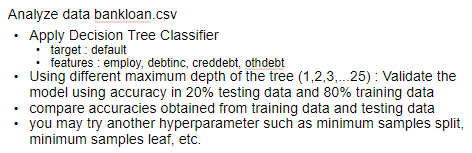

> ## Selection Process of Maximum Depth

In [18]:
depths = range(1,25)
testing_accuracies = []
training_accuracies = []
score = 0

for i in depths:
  tree = DecisionTreeClassifier(
      criterion = 'entropy',
      max_depth = i)
  tree.fit(X_train,y_train)

  y_predict_train = tree.predict(X_train)
  training_accuracies.append(accuracy_score(y_train,y_predict_train))

  y_predict_test = tree.predict(X_test)
  acc_score = accuracy_score(y_test,y_predict_test)
  testing_accuracies.append(acc_score)

  if score < acc_score:
    best_depth = i
    score = acc_score

Text(0, 0.5, 'accuracy')

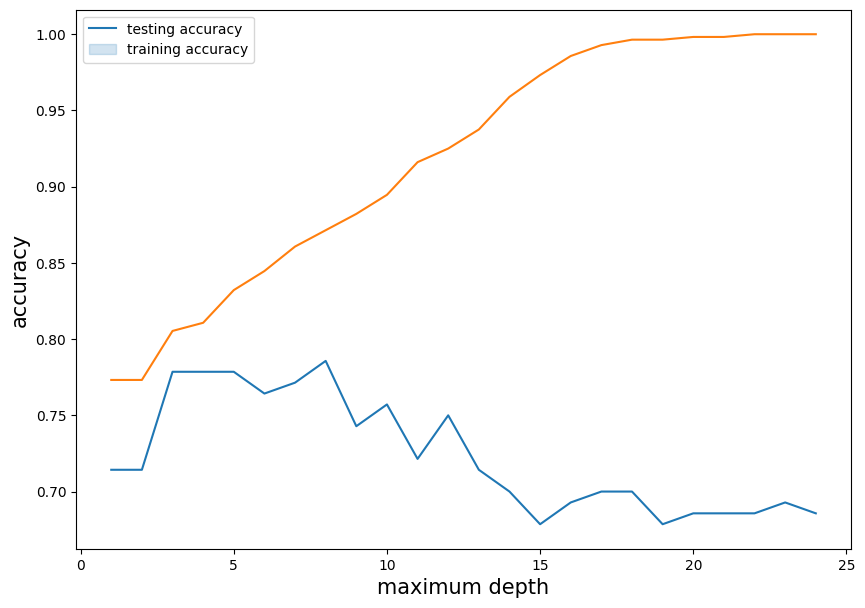

In [20]:
plt.figure(figsize = (10,7))
sns.lineplot(x = depths, y = testing_accuracies)
sns.lineplot(x = depths,y = training_accuracies)
plt.legend(['testing accuracy','training accuracy'])
plt.xlabel('maximum depth', fontsize = 15)
plt.ylabel('accuracy', fontsize = 15)

In [12]:
print('best maximum depth:', best_depth)
print('accuracy:', score)

best maximum depth: 8
accuracy: 0.7857142857142857


1. The best maximum depth for this case is 8 with 78.57 % accuracy.
1. The deeper the tree, the ML method getting overfitting
1. when the max depth 25, the accuracy in training set almost 100% while in test set the accuracy is very bad.